In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/career-prediction-dataset/Data_final.csv")

data.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [3]:
list_career = list(data['Career'].unique())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.1+ KB


In [4]:
data.describe()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,7.294857,7.538286,5.548952,6.863714,5.466381,5.939619,4.376476,5.163810,5.724190,6.794381
std,1.398485,1.215005,1.643137,1.515778,0.868926,1.958362,1.948409,1.747213,1.872927,1.495273
min,2.670000,3.560000,2.890000,3.230000,2.890000,2.890000,2.340000,3.010000,3.010000,3.450000
25%,6.670000,7.340000,4.230000,5.450000,4.670000,4.450000,3.120000,3.670000,4.340000,5.450000
50%,7.230000,7.670000,5.230000,6.450000,5.450000,5.120000,3.450000,4.450000,4.670000,7.450000
75%,8.670000,8.340000,7.010000,8.120000,6.010000,7.780000,4.450000,6.780000,7.670000,8.120000
max,9.450000,9.450000,9.340000,9.340000,8.120000,9.450000,9.230000,9.340000,9.340000,9.340000


In [5]:
X = data.iloc[:, 0:-1]

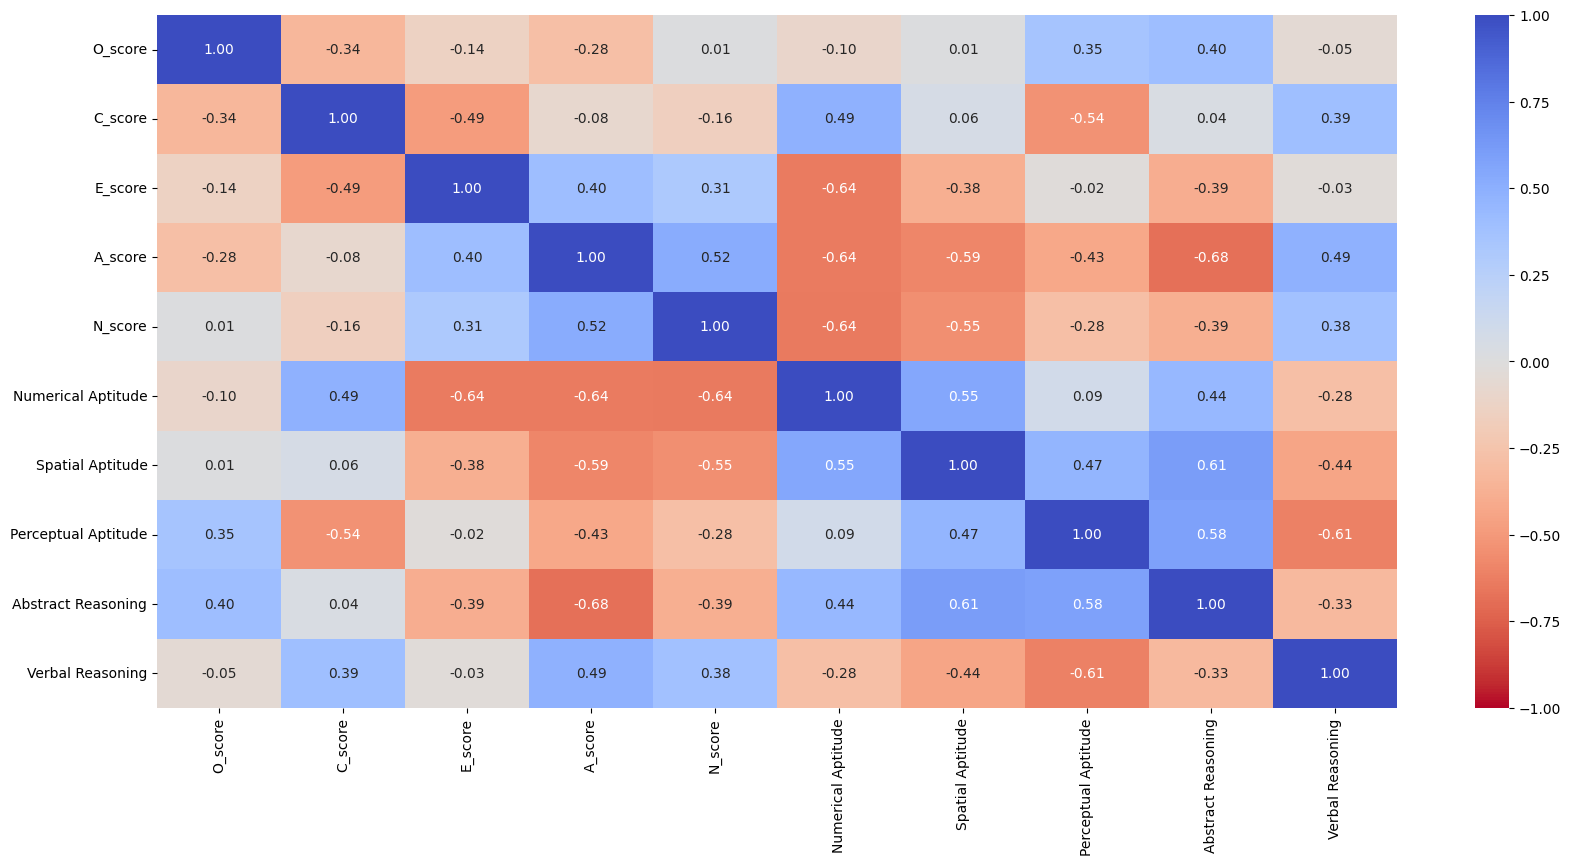

In [6]:
plt.figure(figsize=(20,9))
sns.heatmap(X.corr(), cmap="coolwarm_r", vmin=-1, annot=True, fmt=".2f")
plt.show()

# Data Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
cols = X.columns
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
0,0.410029,0.867572,0.086822,0.345336,0.256214,0.966463,0.322206,0.595577,0.770932,0.453311
1,0.901180,0.358234,0.258915,0.527005,0.256214,0.339939,0.886792,0.770932,0.526066,0.434635
2,0.508850,0.546689,1.000000,0.708674,0.405354,0.509146,0.274311,0.543444,0.578199,0.848896
3,0.951327,0.886248,0.207752,0.399345,0.319312,0.762195,0.435414,0.543444,1.000000,0.716469
4,0.557522,0.679117,0.431008,0.963993,0.256214,0.373476,0.242380,0.508689,0.437599,0.886248


In [9]:
X.drop(['O_score','C_score','E_score','A_score','N_score'],axis=1,inplace=True)

/tmp/ipykernel_34/2738076705.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X.drop(['O_score','C_score','E_score','A_score','N_score'],axis=1,inplace=True)


# DBSCAN

In [12]:
X

,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
0,0.966463,0.322206,0.595577,0.770932,0.453311
1,0.339939,0.886792,0.770932,0.526066,0.434635
2,0.509146,0.274311,0.543444,0.578199,0.848896
3,0.762195,0.435414,0.543444,1.000000,0.716469
4,0.373476,0.242380,0.508689,0.437599,0.886248
...,...,...,...,...,...
100,0.237805,0.079826,0.017378,0.262243,0.830221
101,0.237805,0.079826,0.017378,0.262243,0.339559
102,0.814024,0.773585,0.473934,0.701422,0.339559
103,0.983232,0.886792,0.595577,0.807267,0.376910


In [15]:
list_career

['Accountant',
 'Graphic Designer',
 'Salesperson',
 'Research Scientist',
 'Teacher',
 'Architect',
 'Nurse',
 'Software Developer',
 'Psychologist',
 'Chef',
 'Marketing Manager',
 'Physician',
 'Artist',
 'Human Resources Manager',
 'Construction Engineer',
 'Journalist',
 'Astronomer',
 'Financial Analyst',
 'Biologist',
 'Event Planner',
 'Real Estate Agent',
 'Environmental Scientist',
 'Lawyer',
 'IT Support Specialist',
 'Fashion Designer',
 'Marketing Coordinator',
 'Biomedical Engineer',
 'Event Photographer',
 'Data Analyst',
 'Pharmacist',
 'Social Worker',
 'Financial Planner',
 'Biotechnologist',
 'HR Recruiter',
 'Software Quality Assurance Tester',
 'Elementary School Teacher',
 'Industrial Engineer',
 'Market Research Analyst',
 'Financial Auditor',
 'Musician',
 'Police Detective',
 'Marketing Copywriter',
 'Zoologist',
 'Speech Therapist',
 'Mechanical Engineer',
 'Forensic Scientist',
 'Social Media Manager',
 'Geologist',
 'Web Developer',
 'Wildlife Biologist',
 '

# Analyze results

# Clustering Groups by DBSCAN

In [ ]:
for i in pd.Series(dbscan.labels_).unique():
    careers = data[data['Groups'] == i]['Career'].values
    print(f'\n- - - Group {i} with size {len(careers)}:\n')
    print(careers)

# KMeans

In [23]:
X

,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
0,0.966463,0.322206,0.595577,0.770932,0.453311
1,0.339939,0.886792,0.770932,0.526066,0.434635
2,0.509146,0.274311,0.543444,0.578199,0.848896
3,0.762195,0.435414,0.543444,1.000000,0.716469
4,0.373476,0.242380,0.508689,0.437599,0.886248
...,...,...,...,...,...
100,0.237805,0.079826,0.017378,0.262243,0.830221
101,0.237805,0.079826,0.017378,0.262243,0.339559
102,0.814024,0.773585,0.473934,0.701422,0.339559
103,0.983232,0.886792,0.595577,0.807267,0.376910


In [20]:
from sklearn.cluster import KMeans

clusters = 10
km = KMeans(n_clusters=clusters, n_init = 10)
km.fit(X)

pd.Series(km.labels_).unique()

array([7, 2, 0, 8, 3, 9, 5, 4, 6, 1], dtype=int32)

In [25]:
import joblib

In [26]:
joblib.dump(km, 'kmeans_career.pkl')

['kmeans_career.pkl']

In [21]:
data['Groups_2'] = km.labels_
data.sort_values('Groups_2', inplace=True)
data.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Groups,Groups_2
80,6.78,8.45,3.45,6.45,5.45,8.12,3.12,3.78,4.45,7.67,Database Analyst,0,0
38,6.78,8.67,4.45,6.01,4.78,8.34,3.23,3.67,4.12,7.23,Financial Auditor,0,0
23,6.34,8.12,2.89,6.78,4.78,7.45,3.23,3.56,4.23,7.01,IT Support Specialist,0,0
97,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Police Officer,0,0
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer,0,0


# Clustering Groups by KMeans

In [22]:
for i in pd.Series(km.labels_).unique():
    careers = data[data['Groups_2'] == i]['Career'].values
    print(f'\n- - - Group {i} with size {len(careers)}:\n')
    print(careers)


- - - Group 7 with size 6:

['Human Rights Lawyer' 'Musician' 'Elementary School Teacher'
 'Environmental Scientist' 'Nurse' 'Game Developer']

- - - Group 2 with size 7:

['Quality Control Inspector' 'Dental Hygienist' 'Event Planner'
 'Aerospace Engineer' 'Speech Therapist' 'Industrial Engineer'
 'Journalist']

- - - Group 0 with size 10:

['Database Analyst' 'Financial Auditor' 'IT Support Specialist'
 'Police Officer' 'Graphic Designer' 'Market Researcher'
 'Electrical Engineer' 'Real Estate Agent' 'Lawyer'
 'Air Traffic Controller']

- - - Group 8 with size 7:

['Environmental Engineer' 'Urban Planner' 'Mechanical Designer'
 'Astronomer' 'Physician' 'Public Relations Specialist'
 'Customs and Border Protection Officer']

- - - Group 3 with size 9:

['Marketing Manager' 'Marriage Counselor' 'Interior Designer'
 'Market Research Analyst' 'Airline Pilot' 'Environmental Scientist'
 'Civil Engineer' 'Financial Advisor' 'Police Detective']

- - - Group 9 with size 29:

['Robotics Engin

In [28]:
def predict_career_group(test_scores, data):
   # Load model
   kmeans = joblib.load('kmeans_career.pkl')
   
   # Predict cluster
   cluster = kmeans.predict([list(test_scores.values())])[0]
   
   # Get careers in that cluster
   careers = data[data['Groups_2'] == cluster]['Career'].values
   
   return {
       'cluster': cluster,
       'careers': careers,
       'cluster_size': len(careers)
   }


In [29]:
test_scores = {
   'Numerical Aptitude': 0.8,
   'Spatial Aptitude': 0.7,
   'Perceptual Aptitude': 0.6,
   'Abstract Reasoning': 0.9,
   'Verbal Reasoning': 0.5
}

results = predict_career_group(test_scores, data)
print(f"\nPredicted Cluster: {results['cluster']}")
print(f"Cluster Size: {results['cluster_size']}")
print("Recommended Careers in this cluster:")
print(results['careers'])


Predicted Cluster: 2
Cluster Size: 7
Recommended Careers in this cluster:
['Quality Control Inspector' 'Dental Hygienist' 'Event Planner'
 'Aerospace Engineer' 'Speech Therapist' 'Industrial Engineer'
 'Journalist']


In [31]:
# Train and save KMeans model
from sklearn.cluster import KMeans
import joblib

def train_kmeans(X, n_clusters=10):
   # Train KMeans
   kmeans = KMeans(n_clusters=n_clusters, n_init=10)
   kmeans.fit(X)
   
   # Save model
   joblib.dump(kmeans, 'kmeans_career.pkl')
   return kmeans

# Function to predict group and get careers
def predict_career_group(test_scores, data):
   # Load model
   kmeans = joblib.load('kmeans_career.pkl')
   
   # Predict cluster
   cluster = kmeans.predict([list(test_scores.values())])[0]
   
   # Get careers in that cluster
   careers = data[data['Groups_2'] == cluster]['Career'].values
   
   return {
       'cluster': cluster,
       'careers': careers,
       'cluster_size': len(careers)
   }

# Training
kmeans = train_kmeans(X)
data['Groups_2'] = kmeans.labels_

# Print cluster info
print("Cluster Information:")
for i in pd.Series(kmeans.labels_).unique():
   careers = data[data['Groups_2'] == i]['Career'].values
   print(f'\nGroup {i} (Size: {len(careers)}):')
   print(careers)

# Example usage
test_scores = {
   'Numerical Aptitude': 0.8,
   'Spatial Aptitude': 0.7,
   'Perceptual Aptitude': 0.6,
   'Abstract Reasoning': 0.9,
   'Verbal Reasoning': 0.5
}

results = predict_career_group(test_scores, data)
print(f"\nPredicted Cluster: {results['cluster']}")
print(f"Cluster Size: {results['cluster_size']}")
print("Recommended Careers in this cluster:")
print(results['careers'])

Cluster Information:

Group 8 (Size: 6):
['Database Analyst' 'Police Officer' 'Real Estate Agent'
 'Interior Designer' 'Police Detective' 'Urban Planner']

Group 9 (Size: 3):
['Financial Auditor' 'Technical Writer' 'Social Worker']

Group 4 (Size: 10):
['IT Support Specialist' 'Electrical Engineer' 'Dental Hygienist'
 'Pediatric Nurse' 'IT Project Manager' 'Physical Therapist' 'Musician'
 'Architect' 'Mechanical Engineer' 'Marketing Coordinator']

Group 7 (Size: 8):
['Graphic Designer' 'Lawyer' 'Radiologic Technologist' 'Video Game Tester'
 'Event Planner' 'Industrial Engineer' 'Speech Pathologist'
 'Software Developer']

Group 1 (Size: 19):
['Market Researcher' 'Biomedical Engineer' 'Zoologist' 'Speech Therapist'
 'Forensic Scientist' 'Research Scientist' 'Web Developer'
 'Human Resources Manager' 'Tax Collector' 'Chef' 'Advertising Executive'
 'Chiropractor' 'Administrative Officer' 'Environmental Engineer'
 'Robotics Engineer' 'Psychologist' 'Geologist' 'Biomedical Researcher'
 'For

In [34]:
import json
import joblib
import pandas as pd
from sklearn.cluster import KMeans

# Save career mappings
career_clusters = {}
for i in pd.Series(kmeans.labels_).unique():
    careers = data[data['Groups_2'] == i]['Career'].values.tolist()
    career_clusters[str(i)] = careers

# Save to JSON file
with open('career_clusters.json', 'w') as f:
    json.dump(career_clusters, f)

# Save models and data
joblib.dump(kmeans, 'kmeans_career.pkl')
joblib.dump(km, 'career_predictor.pkl')  # Random Forest model if you're using it
joblib.dump(ms, 'label_encoder.pkl') 

['label_encoder.pkl']